In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.activations import linear, relu, sigmoid
from tensorflow.keras.losses import SparseCategoricalCrossentropy
from keras.callbacks import LambdaCallback
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

In [2]:
data = np.load('Datasets/Wood_Training.npy', allow_pickle= True)
data2 = np.load('Datasets/Wood_Testing.npy', allow_pickle= True)

data.shape, data2.shape

((264, 321), (132, 321))

In [3]:
X_train = data[:, :-1]
y_train = data[:, -1]  

X_test = data2[:, :-1]
y_test = data2[:, -1]  

X_train.shape, y_train.shape, X_test.shape, y_test.shape

((264, 320), (264,), (132, 320), (132,))

In [13]:
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)

scaler2 = StandardScaler()
scaler2.fit(X_test)

X_test = scaler2.transform(X_test)

In [14]:
# Initialize the encoder
le= LabelEncoder()
y_train_encoded= le.fit_transform(y_train)

le2= LabelEncoder()
y_test_encoded= le2.fit_transform(y_test)

In [15]:
print(X_train[1])

[ 0.58552355  0.53005916  0.53890752  0.50218286  0.50189417  0.49427356
  0.47671802  0.47266271  0.458082    0.45893391  0.45077399  0.43913676
  0.42246196  0.41306964  0.40857131  0.3922769   0.39230229  0.38790248
  0.38152022  0.37474349  0.3739933   0.37917819  0.37921078  0.36010027
  0.35251261  0.37636027  0.34673916  0.34000299  0.36684838  0.34936187
  0.36075536  0.32682032  0.36811586  0.3303851   0.34429097  0.36482752
  0.36044004  0.35814239  0.32888164  0.33102924  0.31983507  0.30897157
  0.32585558  0.29991317  0.31139432  0.300713    0.30228831  0.2990704
  0.30386412  0.29654754  0.30457602  0.30962256  0.30999066  0.31655893
  0.32460937  0.32891511  0.33100862  0.34250838  0.35242242  0.35846646
  0.35908273  0.37360483  0.3887986   0.39518037  0.40541742  0.41069444
  0.42906867  0.42756542  0.44176022  0.45765616  0.46287409  0.47920309
  0.47020108  0.48378425  0.49774058  0.50662564  0.51318412  0.52004141
  0.52060563  0.53095512  0.53052054  0.53477355  0.

In [16]:
X_train = X_train.reshape(-1, 320, 1)
X_test = X_test.reshape(-1, 320, 1)

X_train.shape, X_test.shape

((264, 320, 1), (132, 320, 1))

In [17]:
print(X_train[1])

[[ 0.58552355]
 [ 0.53005916]
 [ 0.53890752]
 [ 0.50218286]
 [ 0.50189417]
 [ 0.49427356]
 [ 0.47671802]
 [ 0.47266271]
 [ 0.458082  ]
 [ 0.45893391]
 [ 0.45077399]
 [ 0.43913676]
 [ 0.42246196]
 [ 0.41306964]
 [ 0.40857131]
 [ 0.3922769 ]
 [ 0.39230229]
 [ 0.38790248]
 [ 0.38152022]
 [ 0.37474349]
 [ 0.3739933 ]
 [ 0.37917819]
 [ 0.37921078]
 [ 0.36010027]
 [ 0.35251261]
 [ 0.37636027]
 [ 0.34673916]
 [ 0.34000299]
 [ 0.36684838]
 [ 0.34936187]
 [ 0.36075536]
 [ 0.32682032]
 [ 0.36811586]
 [ 0.3303851 ]
 [ 0.34429097]
 [ 0.36482752]
 [ 0.36044004]
 [ 0.35814239]
 [ 0.32888164]
 [ 0.33102924]
 [ 0.31983507]
 [ 0.30897157]
 [ 0.32585558]
 [ 0.29991317]
 [ 0.31139432]
 [ 0.300713  ]
 [ 0.30228831]
 [ 0.2990704 ]
 [ 0.30386412]
 [ 0.29654754]
 [ 0.30457602]
 [ 0.30962256]
 [ 0.30999066]
 [ 0.31655893]
 [ 0.32460937]
 [ 0.32891511]
 [ 0.33100862]
 [ 0.34250838]
 [ 0.35242242]
 [ 0.35846646]
 [ 0.35908273]
 [ 0.37360483]
 [ 0.3887986 ]
 [ 0.39518037]
 [ 0.40541742]
 [ 0.41069444]
 [ 0.42906

In [7]:
config = tf.compat.v1.ConfigProto(gpu_options =
                         tf.compat.v1.GPUOptions(per_process_gpu_memory_fraction=0.8)
)

config.gpu_options.allow_growth = True
session = tf.compat.v1.Session(config=config)
tf.compat.v1.keras.backend.set_session(session)

physical_devices = tf.config.experimental.list_physical_devices('GPU')
print("Num GPUs Available: ", len(physical_devices))


Num GPUs Available:  1


In [8]:
# Define the 1D CNN model
def create_1d_cnn(input_shape):
    
    model = tf.keras.models.Sequential()

    # Conv Block 1
    model.add(tf.keras.layers.Conv1D(128, kernel_size=3, strides=1, padding='same', input_shape=input_shape))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.AveragePooling1D(pool_size=2))

    # Conv Block 2
    model.add(tf.keras.layers.Conv1D(64, kernel_size=3, strides=1, padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.AveragePooling1D(pool_size=2))

    # Conv Block 3
    model.add(tf.keras.layers.Conv1D(32, kernel_size=5, strides=1, padding='same'))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.AveragePooling1D(pool_size=2))

    # Fully Connected Block
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(256))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(128))
    model.add(tf.keras.layers.BatchNormalization())
    model.add(tf.keras.layers.ReLU())
    model.add(tf.keras.layers.Dropout(0.5))

    model.add(tf.keras.layers.Dense(1, activation='sigmoid'))

    return model

#input_shape = (320,1)  # Example input shape (adjust according to your data)
#model = create_1d_cnn(input_shape)
#model.summary()

In [ ]:
# Create the model
input_shape = (320, 1)  # Update based on your input
model = create_1d_cnn(input_shape)

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Use 'sparse_categorical_crossentropy' if y is not one-hot encoded
              metrics=['accuracy', 
                       tf.keras.metrics.Precision(name='precision'),
                       tf.keras.metrics.Recall(name='recall')])

# Train the model
history = model.fit(X_train, y_train_encoded, 
                    epochs= 50,  # Adjust epochs as needed
                    batch_size=32,  # Adjust batch size as needed
                    validation_data=(X_test, y_test_encoded),
                    callbacks=[
                        tf.keras.callbacks.EarlyStopping(
                            monitor = 'loss',
                            patience = 500,
                            restore_best_weights = True
                        )
                    ]
)


# Evaluate the model on the test data
test_loss, test_acc, test_precision, test_recall = model.evaluate(X_test, y_test_encoded)

print(f"Test accuracy: {test_acc}")
print(f"Test precision: {test_precision}")
print(f"Test recall: {test_recall}")

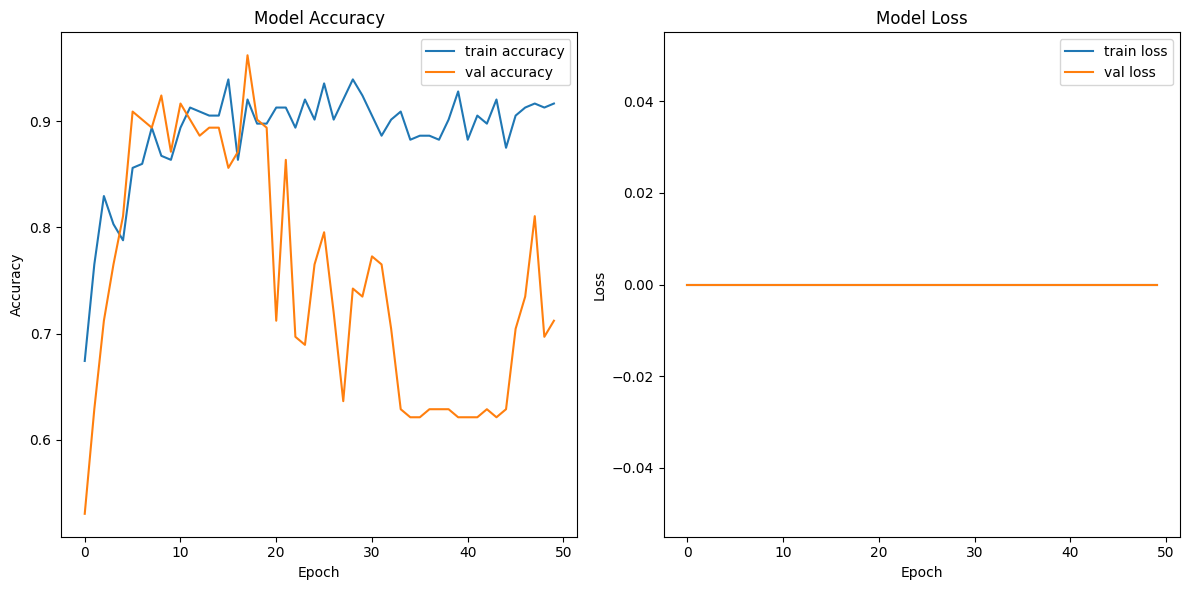

In [9]:
# Plot training & validation accuracy values
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()